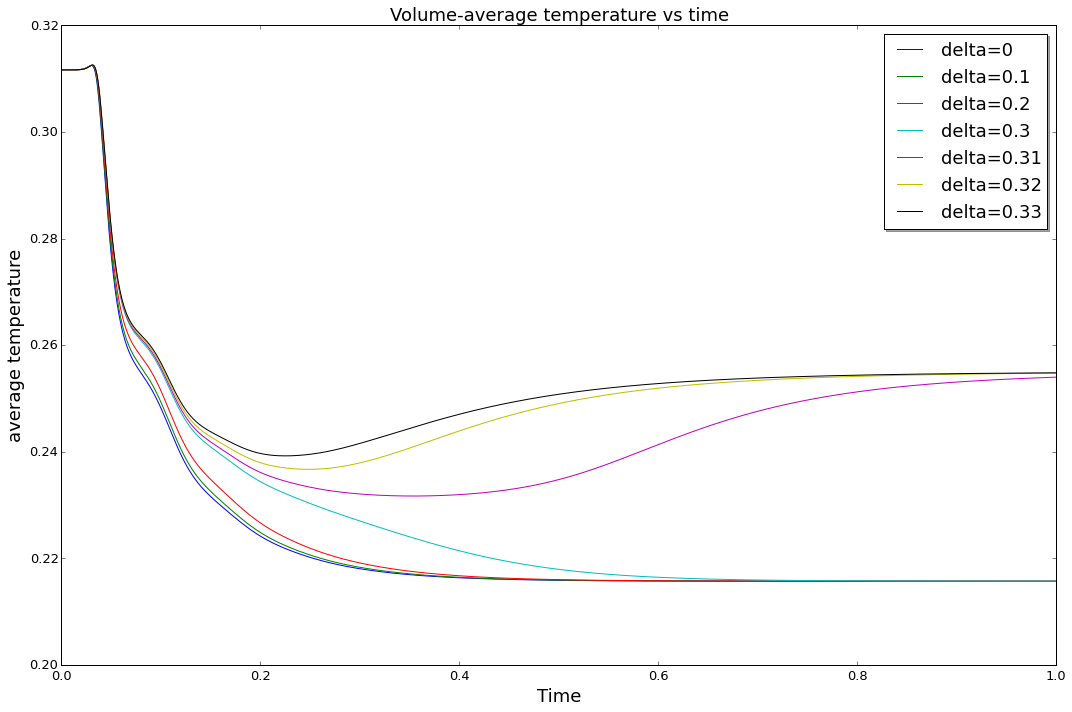

In [8]:
from rayleigh_diagnostics import G_Avgs, build_file_list
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

#The indices associated with our various outputs are stored in a lookup table
#as part of the GlobalAverage data structure.  We define several variables to
#hold those indices here:

delta_list = ['delta=0','delta=0.1','delta=0.2','delta=0.3','delta=0.31','delta=0.32','delta=0.33']
sizetuple=(15,10)

fig, ax = plt.subplots(figsize=sizetuple)

lut = a.lut

#In this case we need the output temperature asdociated with the motions
temp = lut[501]

for x in range(1,8):
    # Build a list of all files ranging from iteration 0 million to 1 million
    files = build_file_list(0,1000000,path='G_Avgs'+str(x))
    a = G_Avgs(filename=files[0],path='')

    nfiles = len(files)
    for i,f in enumerate(files):
        a = G_Avgs(filename=f,path='')
        if (i == 0):
            nq = a.nq
            niter = a.niter
            gavgs = numpy.zeros((niter*nfiles,nq),dtype='float64')
            iters = numpy.zeros(niter*nfiles,dtype='int32')
            time = numpy.zeros(niter*nfiles,dtype='float64')
        i0 = i*niter
        i1 = (i+1)*niter
        gavgs[i0:i1,:] = a.vals
        time[i0:i1] = a.time
        iters[i0:i1] = a.iters

    ax.plot(time, gavgs[:,temp], label=delta_list[x-1])


ax.legend(loc='upper right', shadow=True,fontsize=18)
ax.set_xlim([0,1.0])
ax.set_title('Volume-average temperature vs time',fontsize=18)
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('average temperature',fontsize=18)
plt.tick_params(labelsize=13)


saveplot = False # Plots appear in the notebook and are not written to disk (set to True to save to disk)
savefile = 'energy_trace.pdf'  #Change .pdf to .png if pdf conversion gives issues
plt.tight_layout()
plt.show()